In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [24]:
#Quantization Matrix Generator
import numpy as np

def generate_q_matrix(quality):
    """
    Generate an 8x8 JPEG quantization matrix based on a given quality level.
    
    Parameters:
        quality (int): Quality level (1-100). Higher means less compression.
        
    Returns:
        np.ndarray: Scaled quantization matrix.
    """
    standard_q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99]
    ])

    # Compute scaling factor
    scale = (100 - quality) / 50 if quality > 50 else 50 / quality
    
    if quality == 50:
        return standard_q_matrix

    return np.clip(np.floor(standard_q_matrix * scale), 1, 255).astype(int)



In [25]:
def jpeg_conversion(img, q):
    compressed_img = np.zeros_like(img, dtype=np.float32)
    q_matrix = generate_q_matrix(q)
    h,w = img.shape
    for i in range(0,h,8):
        for j in range(0,w,8):
            block = np.float32(img[i:i + 8, j:j + 8])       
            if block.shape != (8,8):
                continue
            dct_block = cv2.dct(block - 128)
            q_block = np.round(dct_block / q_matrix)
            dq_block = q_block * q_matrix
            idct_block = cv2.idct(dq_block) + 128
            compressed_img[i:i + 8, j:j + 8] = idct_block

    compressed_img = np.clip(compressed_img,0,255).astype(np.uint8)
    return compressed_img

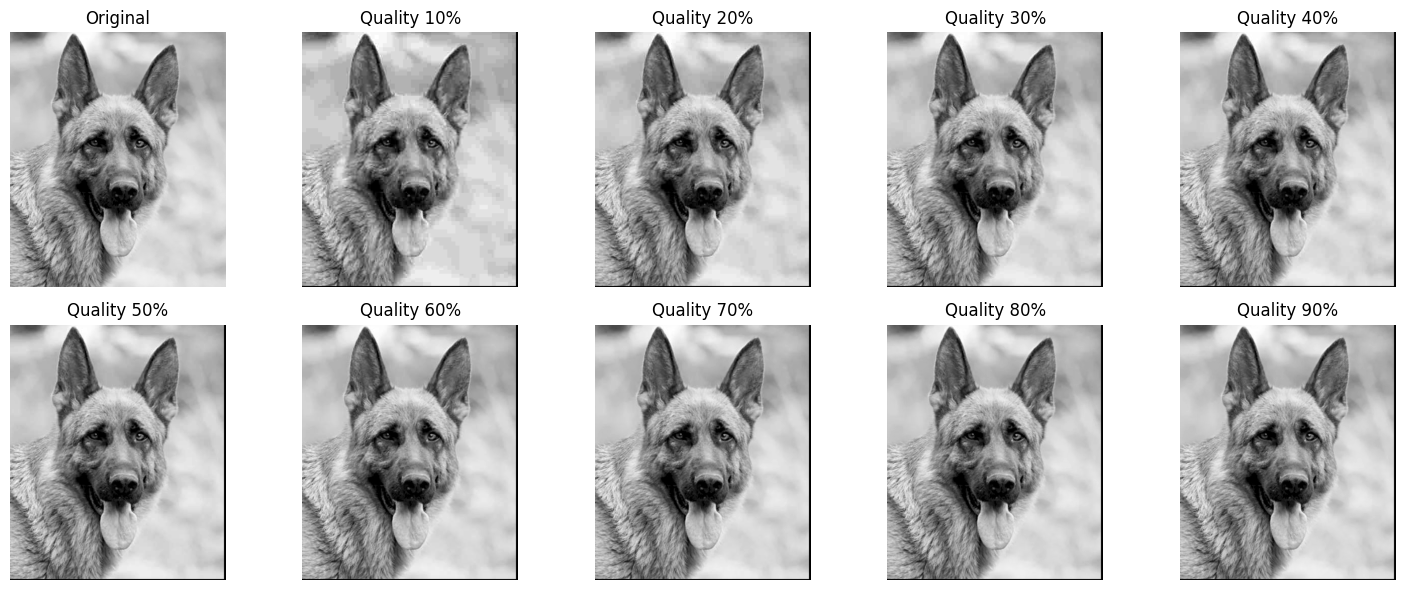

In [26]:
img = cv2.imread("German-Shepherd-dog.png", cv2.IMREAD_GRAYSCALE)

variant = [10,20,30,40,50,60,70,80,90]
result = [jpeg_conversion(img, i) for i in variant]

plt.figure(figsize=(15,6))
plt.subplot(2, 5, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')
for idx, (image, quality) in enumerate(zip(result, variant), start=2):
    plt.subplot(2, 5, idx)
    plt.imshow(image, cmap='gray')
    plt.title(f"Quality {quality}%")
    plt.axis('off')
plt.tight_layout()
plt.show()
